## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Mean
tumor_vol_mean = merge_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [4]:
#Median
tumor_vol_median = merge_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [5]:
#Variance
tumor_vol_var = merge_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [6]:
tumor_vol_std_dev = merge_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [7]:
tumor_vol_SEM = merge_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_vol_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#Summary statistics table for mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = pd.DataFrame({"Tumor Volume Average":tumor_vol_mean, "Tumor Volume Median":tumor_vol_median,
                            "Tumor Volume Variance":tumor_vol_var, "Tumor Volume Standard Deviation":tumor_vol_std_dev,
                            "Tumor Volume SEM":tumor_vol_SEM})
sort_tumors =tumor_volume.sort_values("Tumor Volume Average", ascending = True)
tumor_volume

,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Data Points for Each Treatment Regimen')

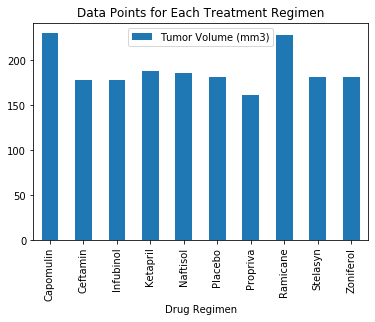

In [9]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
#Using Pandas to chart a DataFrame (Used Matplotlib, Day 2, Activity 2, avg_state_rain for reference)

#Filter the DataFrame down only to those columns to chart
columns_to_chart = merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]

data_points = columns_to_chart.groupby(["Drug Regimen"]).agg ({"Tumor Volume (mm3)" : "count"})

#Use DataFrame.plot() in order to create a bar chart of the data
data_points.plot(kind = "bar")
                 
#Set a title for the chart
plt.title("Data Points for Each Treatment Regimen")                 

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Used Matplotlib, Day 2, Activity 4, plotting_groups for reference (Pyplot)

#Create a group based on the values in the "Drug Regimen" column
medication = merge_df.groupby("Drug Regimen")

#Count how many times each Drug Regimen appears in the group
count_medication = medication["Drug Regimen"].count()

count_medication

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

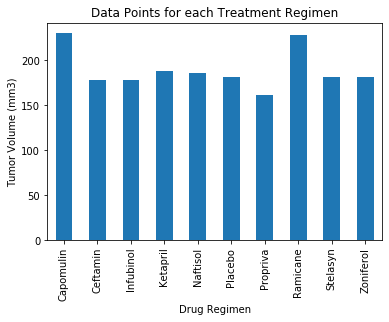

In [11]:
#Create a bar chart based off of the group series from before
count_chart = count_medication.plot(kind="bar")

#Set the xlabel and ylabel 
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Tumor Volume (mm3)")
count_chart.set_title ("Data Points for each Treatment Regimen")                       
plt.show()                      

## Pie plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
#Used Matplotlib, Day 2, Activity 5, Stu_BikeTrippin for reference

#Determine the number of female and male mice.(Need to reset index so "Sex" remains in the index list)
gender_df = pd.DataFrame(merge_df.groupby(["Sex"]).count()).reset_index()
gender_df

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [13]:
#Filter the DataFrame down to only those columns to chart

gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df

,Sex,Count
0,Female,935
1,Male,958


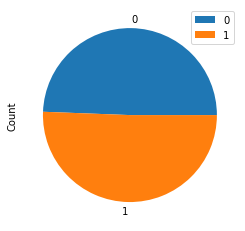

In [55]:
##########Chart the data
gender_df.plot(kind="pie", y = "Count")


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using PYPLOT

#Determine the number of female and male mice
gender_count = (merge_df.groupby(["Sex"]).count())
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


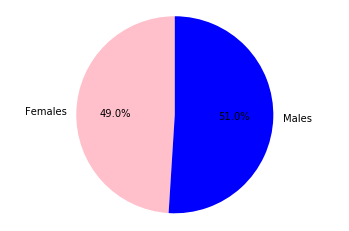

In [16]:
#Set labels
labels = "Females", "Males"

#Set sizes
sizes = [49, 51]

#Set colors for each label
colors = "pink", "blue"

#Create the pie chart using the values listed above
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,autopct = "%1.1f%%", startangle = 90)
ax1.axis("equal")

plt.show()

## Quartiles, outliers and boxplots

In [17]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
#Create Data Frame for "Timepoint" column
final_tumor_vol_df = merge_df.loc[merge_df["Timepoint"] == 45]
final_tumor_vol_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1


In [39]:
#Capomulin Data
capomulin_regimen = final_tumor_vol_df[final_tumor_vol_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_regimen.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,19,s185,Capomulin,Female,3,17,45,23.343598,1
1,29,x401,Capomulin,Female,16,15,45,28.484033,0
2,39,m601,Capomulin,Male,22,17,45,28.430964,1
3,104,u364,Capomulin,Male,18,17,45,31.023923,3
4,124,y793,Capomulin,Male,17,17,45,31.896238,2
5,134,r554,Capomulin,Female,8,17,45,32.377357,3
6,144,m957,Capomulin,Female,3,19,45,33.329098,1
7,164,t565,Capomulin,Female,20,17,45,34.455298,0
8,204,i738,Capomulin,Female,23,20,45,37.311846,2
9,224,w914,Capomulin,Male,24,21,45,36.041047,2


In [60]:
#########################################################
#Capomulin quartiles
# Used Matplotlib, Day 3 Activity 3, Stu_Summary_Stats_Python for reference.

quartiles = capomulin_regimen.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles.loc[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#outlier_tumor_vol = capomulin_regimen.loc[(capomulin_regimen["Tumor Volume (mm3)"] < lower_bound) | capomulin_regimen.loc[(capomulin_regimen["Tumor Volume (mm3)"] > upper_bound)]]
#outlier_tumor_vol                                          

      Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0.25         7.0        17.0       45.0           32.377357               1.0
0.50        16.0        20.0       45.0           37.311846               1.0
0.75        19.0        22.0       45.0           40.159220               2.0
The lower quartile of Tumor Volume (mm3) is: Age_months             7.000000
Weight (g)            17.000000
Timepoint             45.000000
Tumor Volume (mm3)    32.377357
Metastatic Sites       1.000000
Name: 0.25, dtype: float64
The upper quartile of Tumor Volume (mm3) is: Age_months            19.00000
Weight (g)            22.00000
Timepoint             45.00000
Tumor Volume (mm3)    40.15922
Metastatic Sites       2.00000
Name: 0.75, dtype: float64
The interquartile range of Tumor Volume (mm3) is: Age_months            12.000000
Weight (g)             5.000000
Timepoint              0.000000
Tumor Volume (mm3)     7.781863
Metastatic Sites       1.000000
dtype: float64
The 

In [57]:
#Ramicane Data

In [ ]:
#Infubinol Data

In [ ]:
#Ceftamin Data

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen